# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [6]:
df = pd.read_csv("craftcans.csv")
df

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


In [154]:
df = pd.read_csv("craftcans.csv", na_values=["N\A", "?", "", "Does not apply"])

## How many rows do you have in the data? What are the column types?

In [155]:
df.shape

(2416, 7)

In [156]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [157]:
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [158]:
df['ABV'].max()

TypeError: '>=' not supported between instances of 'str' and 'float'

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [159]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [160]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [161]:
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [162]:
df['ABV'].median()

np.float64(5.6)

<Axes: >

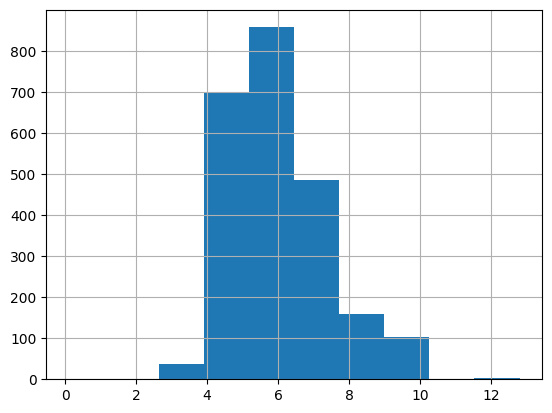

In [163]:
df['ABV'].hist(bins=10)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [164]:
df[df['ABV'].isnull()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,NaN
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,NaN
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,NaN
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [165]:
#this might not be true answer, subject to be deleted later

df.sort_values(by='Location', ascending=False).head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
836,Adam's Stout,Liquid Hero Brewery,"York, PA",American Stout,12 oz.,5.8,40.0
979,Irregardless IPA,Liquid Hero Brewery,"York, PA",American IPA,12 oz.,6.5,75.0
978,Schweet Ale,Liquid Hero Brewery,"York, PA",Fruit / Vegetable Beer,12 oz.,5.2,20.0
977,American Hero,Liquid Hero Brewery,"York, PA",American Amber / Red Ale,12 oz.,5.7,42.0
278,Nitro Can Coffee Stout,Vault Brewing Company,"Yardley, PA",American Stout,12 oz.,5.2,NaN


In [166]:
#leave this answer
df['Location'].value_counts()

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
                    ..
Plainfield, IN       1
Covington, LA        1
Wilson, WI           1
Ukiah, CA            1
Libertyville, IL     1
Name: count, Length: 401, dtype: int64

## List all of the beer from Brooklyn, NY

In [167]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [168]:
brewery_brooklyn = df[df['Location'].str.contains('Brooklyn', na=False)]
print(brewery_brooklyn).max

                                 Beer                Brewery  \
115                            4Beans    Sixpoint Craft Ales   
146                  Todd the Axe Man  Surly Brewing Company   
210                            Jammer    Sixpoint Craft Ales   
246                           Abigale    Sixpoint Craft Ales   
280                          Doomtree  Surly Brewing Company   
404                     Nomader Weiss      Evil Twin Brewing   
421                               Rad    Sixpoint Craft Ales   
439                      Molotov Lite      Evil Twin Brewing   
588                           Bengali    Sixpoint Craft Ales   
713                     Sensi Harvest    Sixpoint Craft Ales   
927                            BLAKKR  Surly Brewing Company   
969                            Hi-Res    Sixpoint Craft Ales   
987             KelSo Nut Brown Lager     KelSo Beer Company   
1057                    Global Warmer    Sixpoint Craft Ales   
1074               Autumnation (2013)   

AttributeError: 'NoneType' object has no attribute 'max'

## What are the five most common styles of beer produced by Sixpoint?

In [169]:
#brewery_brooklyn = df[df['Location'].str.contains('Brooklyn', na=False)].groupby('Style').head(5)
#print(brewery_brooklyn).max
#common_style_brooklyn = df.groupby[df['Location'].str.contains('Brooklyn', na=False)]
#print(common_style_brooklyn).head(5)


brooklyn_brewery = df[df['Location'].str.contains('Brooklyn', na=False)]
common_style_brooklyn = brooklyn_brewery['Style'].value_counts().head(5)
print(common_style_brooklyn)





Style
American IPA                      10
American Double / Imperial IPA     4
American Pale Ale (APA)            3
American Brown Ale                 3
Rye Beer                           3
Name: count, dtype: int64


## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [170]:
df[df['Location'].str.contains('NY', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [171]:
df[df['Location'].str.contains('NY', na=False)].value_counts()

Beer                              Brewery                     Location       Style                                Size               ABV   IBUs 
3Beans                            Sixpoint Craft Ales         Brooklyn, NY   Baltic Porter                        12 oz.             9.9   85.0     1
4Beans                            Sixpoint Craft Ales         Brooklyn, NY   Baltic Porter                        12 oz.             10.0  52.0     1
8 Barrel                          Chatham Brewing             Chatham, NY    American Strong Ale                  16 oz.             8.0   69.0     1
Apollo                            Sixpoint Craft Ales         Brooklyn, NY   American Pale Wheat Ale              16 oz.             5.2   11.0     1
Autumnation (2011-12) (2011)      Sixpoint Craft Ales         Brooklyn, NY   Pumpkin Ale                          16 oz.             6.0   48.0     1
Autumnation (2013)                Sixpoint Craft Ales         Brooklyn, NY   American IPA                

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [172]:
df[df['Beer'].str.contains('IPA')]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
48,Titan IPA,Great Divide Brewing Company,"Denver, CO",American IPA,12 oz.,7.1,NaN
61,Grapefruit IPA,Perrin Brewing Company,"Comstock Park, MI",American IPA,12 oz.,5.0,35.0
92,Linnaeus Mango IPA,Brewery Vivant,"Grand Rapids, MI",American IPA,16 oz.,6.0,NaN
104,Galaxy IPA,Big Muddy Brewing,"Murphysboro, IL",American IPA,16 oz.,7.5,60.0
107,Mosaic Single Hop IPA,Lost Nation Brewing,"East Fairfield, VT",American IPA,16 oz.,5.5,NaN
...,...,...,...,...,...,...,...
2382,Caldera IPA,Caldera Brewing Company,"Ashland, OR",American IPA,12 oz.,6.1,94.0
2387,Big Swell IPA,Maui Brewing Company,"Lahaina, HI",American IPA,12 oz.,6.2,65.0
2394,113 IPA,Sly Fox Brewing Company,"Pottstown, PA",American IPA,12 oz.,7.0,113.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [173]:
df['IBUs'].mean()

np.float64(42.71316725978647)

In [174]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [175]:
#I used na_values at the top and run all over again

df['IBUs'].mean()

np.float64(42.71316725978647)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

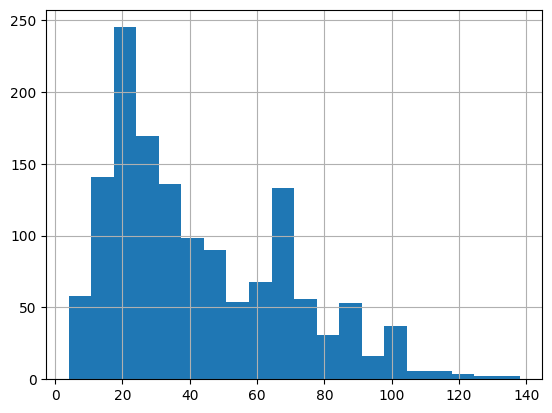

In [176]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [177]:
df[df['IBUs'] >= 75]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


## List all of the beers with IBUs below the 25th percentile

In [179]:
df[df['IBUs'] <= 25]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.7,25.0
10,Rules are Rules,Against the Grain Brewery,"Louisville, KY",German Pilsener,16 oz.,5.0,25.0
11,Flesh Gourd'n,Against the Grain Brewery,"Louisville, KY",Pumpkin Ale,16 oz.,6.6,21.0
...,...,...,...,...,...,...,...
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2395,Dunkel Lager,Sly Fox Brewing Company,"Pottstown, PA",Munich Dunkel Lager,12 oz.,5.3,21.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

<Axes: ylabel='Beer'>

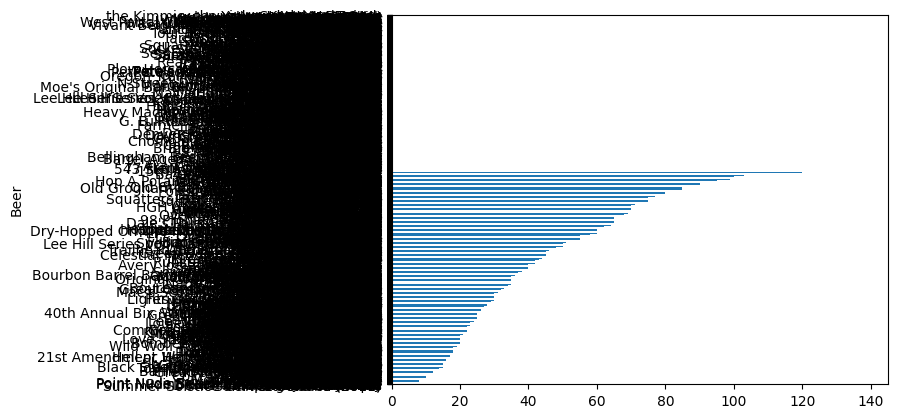

In [184]:
(
    df
    [df.groupby('Beer')['IBUs'].median()
).sort_values().plot(kind='barh')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [ ]:
:( 

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!